In [103]:
#импортирует библиотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve, 
                             classification_report, auc)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [74]:
df=pd.read_csv('adult.csv') #на основе данных csv файла сформируем пандовский датафрейм

In [75]:
df.head() #отобразим первые 5 строк датафрейма

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [76]:
df.info #Выведем основую информацию нашего датафрейма

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [78]:
#Проверим данные на пропуски
df.isnull().sum() #видим, что пропущенных данных нет, но это потому что они обозначены ?, а не nan

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [79]:
# Заменяем "?" на NaN для нормального анализа
df = df.replace('?', np.nan)
df.isnull().sum() #видим, что пропуски есть на самом деле. В дальнейшем заменим их модой

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [80]:
df= df.drop_duplicates() #удалим дубликаты

In [81]:
df.shape

(32537, 15)

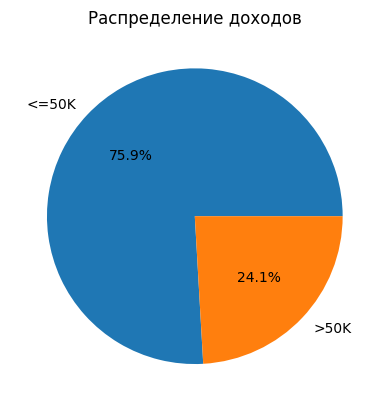

In [82]:
#Начнем рисовать графики. Составим график распределения дохода, сколько зарабатывает до 50к включительно и сколько зарабатывает больше
fig=plt.figure() #создаем пустой обЪект
income_counts = df['income'].value_counts()
wedges, texts, autotexts = plt.pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Распределение доходов'); #Мы видим, что людей зарабатывающих до 50к включительно значительно больше, следовательно, обеспеченных людей меньше

<Figure size 1000x600 with 0 Axes>

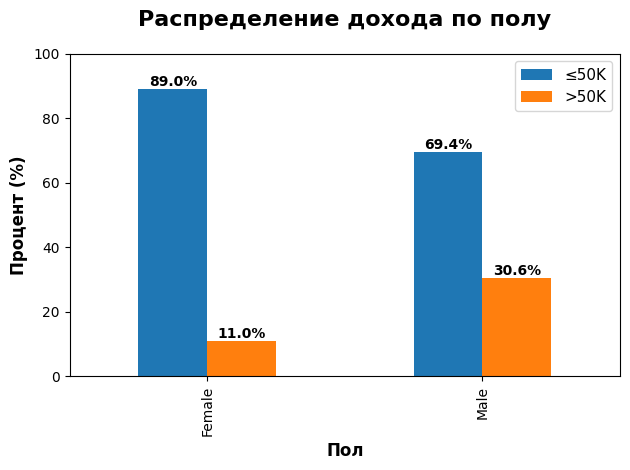

In [83]:
#Посмотрим на влияние пола на доход
plt.figure(figsize=(10, 6)) # Создаем фигуру
sex_income = pd.crosstab(df['sex'], df['income'], normalize='index') * 100 #расчет величины дохода от пола с нормализацией
bars = sex_income.plot(kind='bar')
plt.xlabel('Пол', fontsize=12, fontweight='bold')
plt.ylabel('Процент (%)', fontsize=12, fontweight='bold')
plt.legend(['≤50K', '>50K'], fontsize=11)
plt.title('Распределение дохода по полу', fontsize=16, fontweight='bold', pad=20)
for container in bars.containers:
    plt.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')
plt.ylim(0, 100)
plt.tight_layout();
plt.show() #По графику видно, что мужчины имеют больший доход, причем у мужчин обеспеченный человек встречается втрое чаще

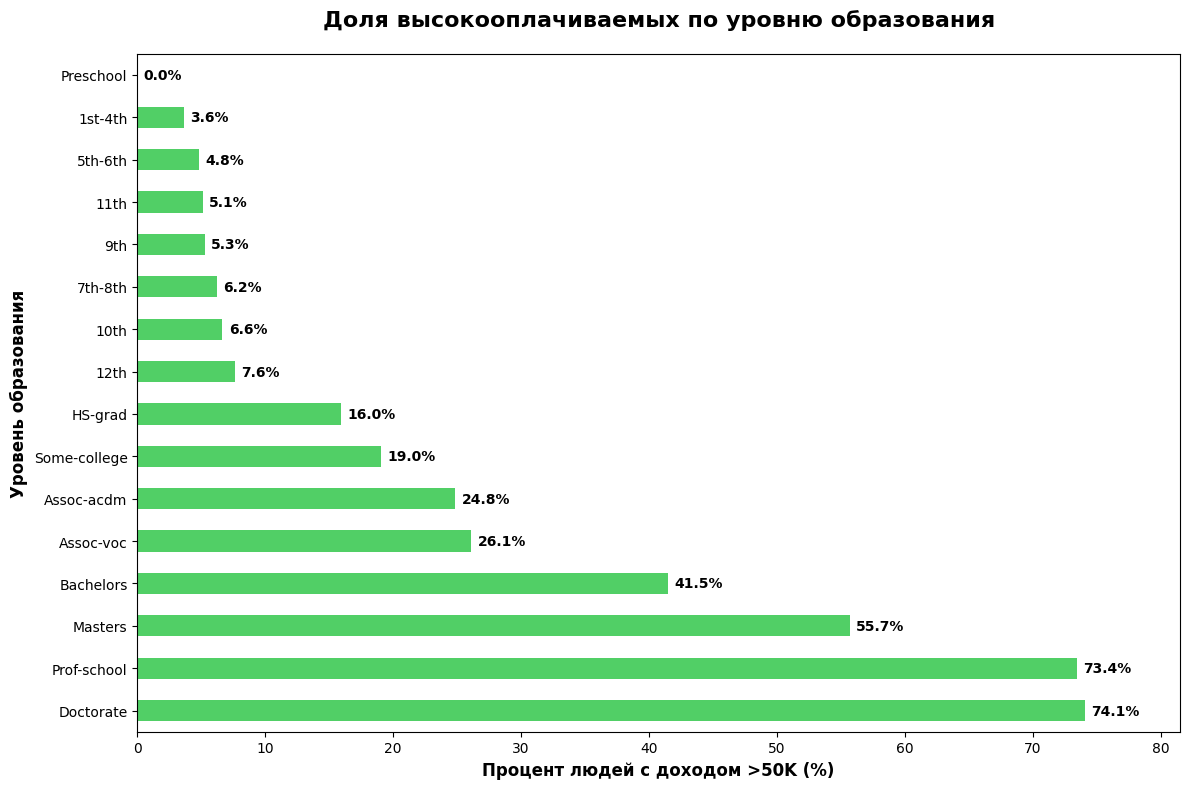

In [84]:
#по аналогии с предыдущим графиком. вывели 2 переменные, произвели нормализацию
plt.figure(figsize=(12, 8)) 
edu_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
edu_income_sorted = edu_income.sort_values('>50K', ascending=False)
# Горизонтальный барчарт
bars = edu_income_sorted['>50K'].plot(kind='barh', color='#51cf66')
# Настройки оформления
plt.title('Доля высокооплачиваемых по уровню образования', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Процент людей с доходом >50K (%)', fontsize=12, fontweight='bold')
plt.ylabel('Уровень образования', fontsize=12, fontweight='bold')
# Добавление значений
for i, v in enumerate(edu_income_sorted['>50K'].values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)
plt.xlim(0, edu_income_sorted['>50K'].max() * 1.1)
plt.tight_layout()
plt.show() #Четкая ПОЛОЖИТЕЛЬНАЯ корреляция: больше образование = выше доход. Doctorate & Prof-school: ~73-74% зарабатывают >50K. Masters: 55.69% зарабатывают >50K
#Bachelors: 41.49% зарабатывают >50K. High School: только 15.95% зарабатывают >50K

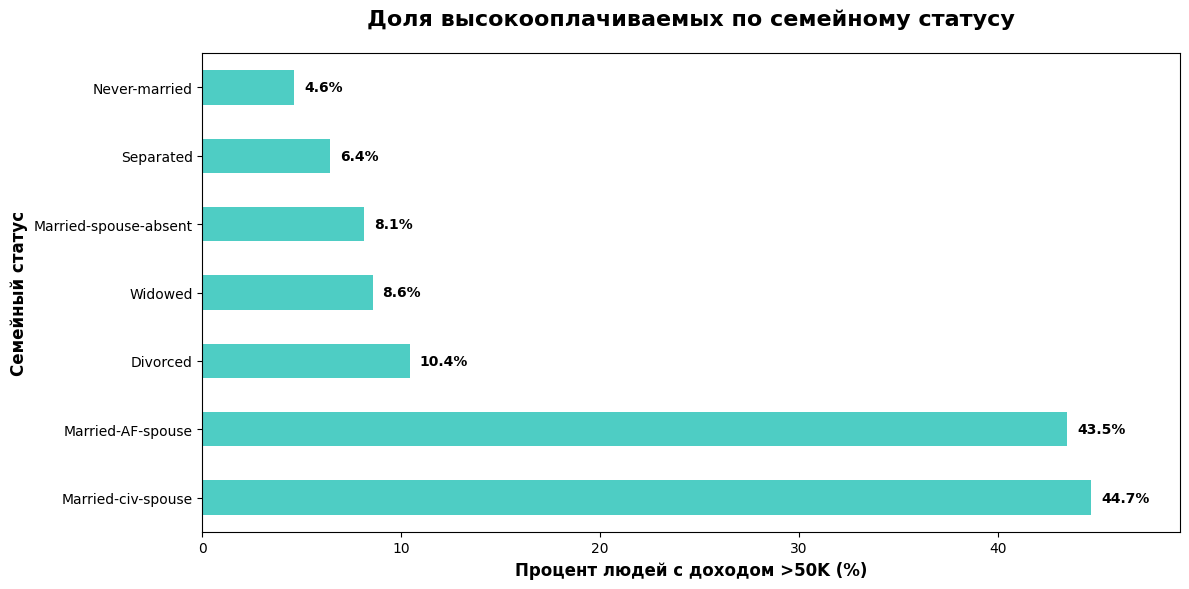

In [85]:
#Технически с точки зрения кода делаем тоже самое
plt.figure(figsize=(12, 6))
marital_income = pd.crosstab(df['marital.status'], df['income'], normalize='index') * 100
marital_income_sorted = marital_income.sort_values('>50K', ascending=False)
# Горизонтальный барчарт
bars = marital_income_sorted['>50K'].plot(kind='barh', color='#4ecdc4')
# Настройки оформления
plt.title('Доля высокооплачиваемых по семейному статусу', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Процент людей с доходом >50K (%)', fontsize=12, fontweight='bold')
plt.ylabel('Семейный статус', fontsize=12, fontweight='bold')
# Добавление значений
for i, v in enumerate(marital_income_sorted['>50K'].values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)
plt.xlim(0, marital_income_sorted['>50K'].max() * 1.1)
plt.tight_layout()
plt.show()
#Мы видим, что среди женатых и никогда не состоявших в браке людей огромная разница в количестве богатых людей. Это связано с тем, что женатые люди,
#как правило старше, а никогда не состоявшие в браке часто в самом начале своей карьеры. Также у женатых людей больше финансовых обязанностей
#(ипотека, семья и тд), что мотивирует их больше зарабатывать. 

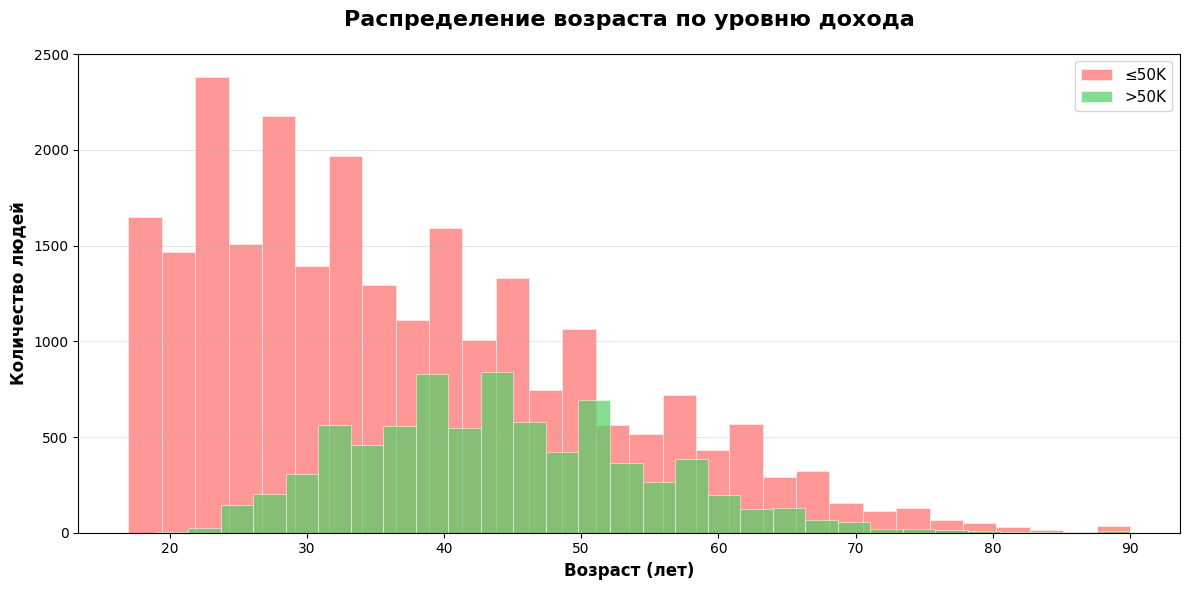

In [86]:
plt.figure(figsize=(12, 6))
age_low = df[df['income'] == '<=50K']['age']
age_high = df[df['income'] == '>50K']['age']
# Гистограмма
plt.hist(age_low, bins=30, alpha=0.7, label='≤50K', color='#ff6b6b', edgecolor='white', linewidth=0.5)
plt.hist(age_high, bins=30, alpha=0.7, label='>50K', color='#51cf66', edgecolor='white', linewidth=0.5)
# Настройки оформления
plt.title('Распределение возраста по уровню дохода', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Возраст (лет)', fontsize=12, fontweight='bold')
plt.ylabel('Количество людей', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
#Люди, зарабатывающие >50K, имеют ПИКИ в возрасте 40-60 лет. Люди, зарабатывающие ≤50K, распределены более равномерно. Опыт работы (возраст) увеличивает доход

In [92]:
# Заполняем пропуски в категориальных колонках самым частым значением (mode)
for col in categorical_cols_with_missing:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
    print(f"{col}: заполнены пропуски на '{mode_value}'")

workclass: заполнены пропуски на 'Private'
occupation: заполнены пропуски на 'Prof-specialty'
native.country: заполнены пропуски на 'United-States'


In [93]:
df.isnull().sum() #видим, что пропусков не осталось

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [95]:
#удалим ненужную колонку 
df= df.drop('fnlwgt', axis=1)

In [97]:
# Целевая переменная 
y = df_clean['income']
y_numeric = (y == '>50K').astype(int) #преобразуем нашу категориальную переменную в числовую бинарную переменную
print(f"Целевая переменная:")
print(f"  >50K: {(y_numeric == 1).sum():,} ({y_numeric.mean():.1%})")
print(f"  <=50K: {(y_numeric == 0).sum():,} ({(1-y_numeric.mean()):.1%})")

Целевая переменная:
  >50K: 7,841 (24.1%)
  <=50K: 24,720 (75.9%)


In [104]:
#Признаки (убираем числовую переменную)
X = df_clean.drop('income', axis=1)
print(f"\nПризнаки: {X.shape[1]} переменных")
# Кодирование категориальных переменных
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"После кодирования: {X_encoded.shape[1]} признаков")
# Нормализация числовых признаков
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_final = X_encoded.copy()
X_final[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])
print("Числовые признаки нормализованы")
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_final, y_numeric, test_size=0.2, random_state=42,stratify=y_numeric)
print(f"\nРазделение данных:")
print(f"  Train: {X_train.shape[0]:,} примеров")
print(f"  Test: {X_test.shape[0]:,} примеров")
print("\nГотово для обучения моделей!")


Признаки: 14 переменных
После кодирования: 97 признаков
Числовые признаки нормализованы

Разделение данных:
  Train: 26,048 примеров
  Test: 6,513 примеров

Готово для обучения моделей!


In [106]:
# Модель 1: Логистическая регрессия
lr_model = LogisticRegression(max_iter=1000, random_state=42) #пишем модель и вводит гиперпараметры
lr_model.fit(X_train, y_train) #обучаем на обучащем наборе данных
y_pred_lr = lr_model.predict(X_test) #предсказываем значения для тестового набора данных
print("Логистическая регрессия обучена")

Логистическая регрессия обучена


In [108]:
# Модель 2: Дерево решений
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Дерево решений обучено")

Дерево решений обучено


In [109]:
# Модель 3: Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Случайный лес обучен")

Случайный лес обучен


In [110]:
# Функция для вычисления метрик
def evaluate_model(name, y_true, y_pred, y_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)   
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-score:  {f1:.3f}")    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba)
        print(f"  ROC-AUC:   {roc_auc:.3f}")    
    return accuracy, f1

In [114]:
# Оценка модели для логистической регрессии:
lr_accuracy, lr_f1 = evaluate_model("Логистическая регрессия", y_test, y_pred_lr, lr_model.predict_proba(X_test)[:, 1])


Логистическая регрессия:
  Accuracy:  0.852 (85.2%)
  Precision: 0.737
  Recall:    0.598
  F1-score:  0.661
  ROC-AUC:   0.903


In [116]:
# Оценка модели для дерева решений:
dt_accuracy, dt_f1 = evaluate_model("Дерево решений", y_test, y_pred_dt,dt_model.predict_proba(X_test)[:, 1])


Дерево решений:
  Accuracy:  0.852 (85.2%)
  Precision: 0.791
  Recall:    0.525
  F1-score:  0.631
  ROC-AUC:   0.896


In [117]:
# Оценка модели для случайного леса:
rf_accuracy, rf_f1 = evaluate_model("Случайный лес", y_test, y_pred_rf,rf_model.predict_proba(X_test)[:, 1])


Случайный лес:
  Accuracy:  0.853 (85.3%)
  Precision: 0.790
  Recall:    0.529
  F1-score:  0.633
  ROC-AUC:   0.908


In [118]:
#сравниваем модели, находим лучшеет и пишем отсортированный список по точности моделей
models_performance = {'Логистическая регрессия': lr_accuracy,'Дерево решений': dt_accuracy, 'Случайный лес': rf_accuracy}
best_model = max(models_performance, key=models_performance.get)
best_accuracy = models_performance[best_model]
print(f"Лучшая модель: {best_model} ({best_accuracy:.3f})")
print("\nРейтинг по точности:")
sorted_models = sorted(models_performance.items(), key=lambda x: x[1], reverse=True)
for i, (model, acc) in enumerate(sorted_models, 1):
    print(f"  {i}. {model}: {acc:.3f}")

Лучшая модель: Случайный лес (0.853)

Рейтинг по точности:
  1. Случайный лес: 0.853
  2. Дерево решений: 0.852
  3. Логистическая регрессия: 0.852


In [120]:
#теперь пишем функцию, которая оценивает анализ в количетстве правильных предсказаний и ошибок
def print_confusion_analysis(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()   
    print(f"\n{name}:")
    print(f"Правильно предсказаны <=50K: {tn}")
    print(f"Правильно предсказаны >50K:  {tp}")
    print(f"Ошибки (>50K → <=50K):      {fn}")
    print(f"Ошибки (<=50K → >50K):      {fp}")    
    return cm
print_confusion_analysis("Логистическая регрессия", y_test, y_pred_lr)
print_confusion_analysis("Дерево решений", y_test, y_pred_dt)  
print_confusion_analysis("Случайный лес", y_test, y_pred_rf)


Логистическая регрессия:
Правильно предсказаны <=50K: 4611
Правильно предсказаны >50K:  938
Ошибки (>50K → <=50K):      630
Ошибки (<=50K → >50K):      334

Дерево решений:
Правильно предсказаны <=50K: 4727
Правильно предсказаны >50K:  823
Ошибки (>50K → <=50K):      745
Ошибки (<=50K → >50K):      218

Случайный лес:
Правильно предсказаны <=50K: 4724
Правильно предсказаны >50K:  829
Ошибки (>50K → <=50K):      739
Ошибки (<=50K → >50K):      221


array([[4724,  221],
       [ 739,  829]])


Топ-10 самых важных признаков:
  marital.status_Married-civ-spouse: 0.196
  capital.gain: 0.157
  education.num: 0.133
  marital.status_Never-married: 0.085
  age: 0.069
  hours.per.week: 0.042
  capital.loss: 0.041
  relationship_Not-in-family: 0.031
  occupation_Exec-managerial: 0.030
  sex_Male: 0.026


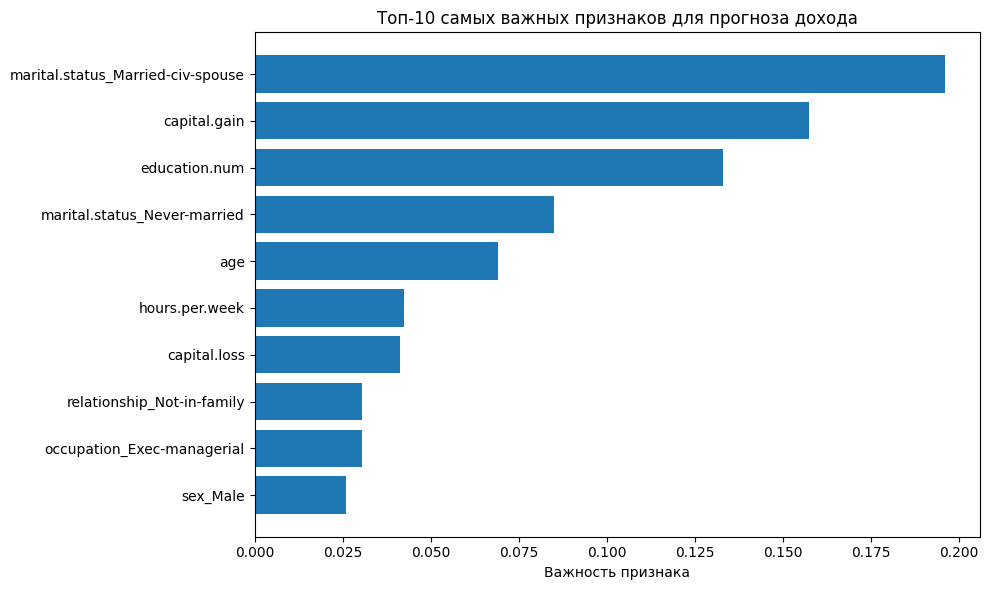

In [121]:
# Получаем важность признаков
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Сортируем по важности
importance_df = pd.DataFrame({'feature': feature_names,'importance': feature_importance}).sort_values('importance', ascending=False).head(10)
print("\nТоп-10 самых важных признаков:")
for i, row in importance_df.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")
# Визуализируем
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Важность признака')
plt.title('Топ-10 самых важных признаков для прогноза дохода')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()